In [60]:
import matplotlib.pyplot as pl
import numpy as np
import pandas as pd
from functions_old.multi_gradient_descent import *
from math import log

In [61]:
# ls = []
# leadger = []
# def categorical_data(x):
#     if x not in ls:
#         ls.append(x)
#     return ls.index(x)

# data['diagnosis'] = data['diagnosis'].apply(categorical_data)
# leadger.append(ls)
# ls =[]
# data['loc'] = data['loc'].apply(categorical_data)
# leadger.append(ls)
# ls =[]
# data['stereo'] = data['stereo'].apply(categorical_data)
# leadger.append(ls)
# ls =[]
# data['sex'] = data['sex'].apply(categorical_data)
# leadger.append(ls)
# ls =[]
# print(leadger)
# # data
# x_data = np.array(data[['ki','gtv']])
# y_data = np.array(data['status'])


In [62]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def fun(x,w,b):
    return sigmoid(np.dot(w,x) + b)

def cost(x,y,w,b):
    k = 0
    for i in range(x.shape[0]):
        k += -log(sigmoid(np.dot(w,x[i]) + b))*y[i] - log(1-sigmoid(np.dot(w,x[i])+b))*(1-y[i])
    return k/x.shape[1]

def compute_gradient(x,y,w,b):
    lambda_ = 1
    dj_dw = np.zeros(x.shape[1])
    dj_db = 0
    for i in range(x.shape[0]):
        k = fun(x[i],w,b)-y[i]
        for j in range(x.shape[1]):
            dj_dw[j] += k*x[i][j]
        dj_db += k

# for regression
    # for j in range(x.shape[0]):
    #     dj_dw[j] = dj_dw[j]/x.shape[0] + (lambda_/x.shape[0]) * w[j]
    return dj_dw/x.shape[0],dj_db/x.shape[0]

def logistic_descent(x,y):
    alpha = 0.01
    w = np.zeros(x.shape[1])
    b =0
    for i in range(10000):
    
        dj_dw,dj_db = compute_gradient(x,y,w,b)

        w = w - alpha*dj_dw
        b = b- alpha*dj_db
        if i%100 ==0:
            # print(w,b,"-------------------------------- cost: ",cost(x,y,w,b))
            pass
    return w,b





In [63]:
x_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

per_w,per_b = logistic_descent(x_train,y_train)
print(per_w,per_b)

[2.30393882 2.07557676] -5.905895008247724


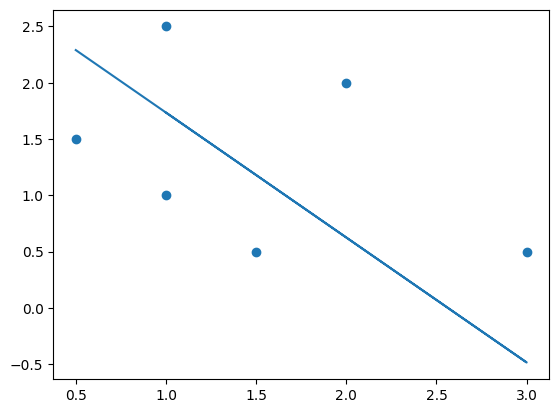

In [64]:
boundary = np.array([ [x[0] ,(-per_w[0]*x[0]-per_b)/per_w[1]]  for x in x_train])

pl.scatter(x_train[:,0], x_train[:,1])
pl.plot(boundary[:,0], boundary[:,1])
pl.show()

In [65]:
data = np.loadtxt("C:\code\ml\Coursera\material\C1 - Supervised Machine Learning - Regression and Classification\week3\C1W3A1\data\ex2data1.txt",delimiter = ',')
x_train = data[:,:2]
y_train = data[:,2]
print(x_train)
y_train

[[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]
 [45.08327748 56.31637178]
 [61.10666454 96.51142588]
 [75.02474557 46.55401354]
 [76.0987867  87.42056972]
 [84.43281996 43.53339331]
 [95.86155507 38.22527806]
 [75.01365839 30.60326323]
 [82.30705337 76.4819633 ]
 [69.36458876 97.71869196]
 [39.53833914 76.03681085]
 [53.97105215 89.20735014]
 [69.07014406 52.74046973]
 [67.94685548 46.67857411]
 [70.66150955 92.92713789]
 [76.97878373 47.57596365]
 [67.37202755 42.83843832]
 [89.67677575 65.79936593]
 [50.53478829 48.85581153]
 [34.21206098 44.2095286 ]
 [77.92409145 68.97235999]
 [62.27101367 69.95445795]
 [80.19018075 44.82162893]
 [93.1143888  38.80067034]
 [61.83020602 50.25610789]
 [38.7858038  64.99568096]
 [61.37928945 72.80788731]
 [85.40451939 57.05198398]
 [52.10797973 63.12762377]
 [52.04540477 69.43286012]
 [40.23689374 71.16774802]
 [54.63510555 52.21388588]
 [33.91550011 98.86943574]
 

array([0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

In [66]:
per_w,per_b = logistic_descent(x_train,y_train)
print(per_w,per_b)

[ 0.41024768 -0.05324509] -7.659003972248845


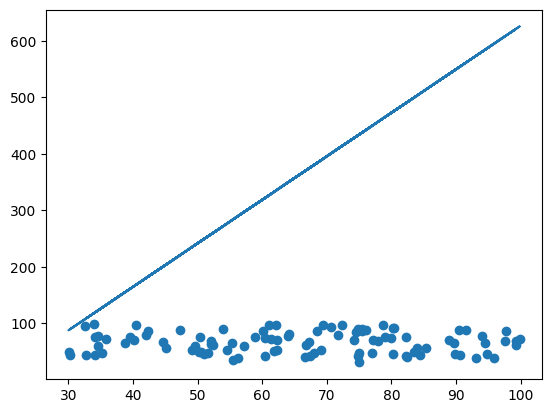

In [67]:
boundary = np.array([ [x[0] ,(-per_w[0]*x[0]-per_b)/per_w[1]]  for x in x_train])
for i in range(y_train.shape[0]):
pl.scatter(x_train[:,0], x_train[y_train[:,1])
pl.plot(boundary[:,0], boundary[:,1])
pl.show()